Project: Creditworthiness Prediction using Random Forest
Dataset: German Credit Dataset
Objective: Build a machine learning pipeline to classify individuals as 'good' or 'bad' credit risks.

Steps:
1. Load and understand the data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Model Training using Random Forest
5. Evaluation with appropriate metrics and cost sensitivity
6. Interpretation and Conclusion

In [24]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [16]:
# Column names as per german.doc file for numeric version (24 attributes + label)
column_names = [f'Attribute_{i}' for i in range(1, 25)] + ['Creditworthiness']

# Load the numerical dataset
df = pd.read_csv('C:/Users/Aiyan Shamshad/Desktop/Intern project final/statlog+german+credit+data/german.data-numeric', delim_whitespace=True, names=column_names)
df.head()


C:\Users\Aiyan Shamshad\AppData\Local\Temp\ipykernel_1324\1088983002.py:5: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('C:/Users/Aiyan Shamshad/Desktop/Intern project final/statlog+german+credit+data/german.data-numeric', delim_whitespace=True, names=column_names)


,Attribute_1,Attribute_2,Attribute_3,Attribute_4,Attribute_5,Attribute_6,Attribute_7,Attribute_8,Attribute_9,Attribute_10,...,Attribute_16,Attribute_17,Attribute_18,Attribute_19,Attribute_20,Attribute_21,Attribute_22,Attribute_23,Attribute_24,Creditworthiness
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Attribute_1       1000 non-null   int64
 1   Attribute_2       1000 non-null   int64
 2   Attribute_3       1000 non-null   int64
 3   Attribute_4       1000 non-null   int64
 4   Attribute_5       1000 non-null   int64
 5   Attribute_6       1000 non-null   int64
 6   Attribute_7       1000 non-null   int64
 7   Attribute_8       1000 non-null   int64
 8   Attribute_9       1000 non-null   int64
 9   Attribute_10      1000 non-null   int64
 10  Attribute_11      1000 non-null   int64
 11  Attribute_12      1000 non-null   int64
 12  Attribute_13      1000 non-null   int64
 13  Attribute_14      1000 non-null   int64
 14  Attribute_15      1000 non-null   int64
 15  Attribute_16      1000 non-null   int64
 16  Attribute_17      1000 non-null   int64
 17  Attribute_18      1000 non-null   

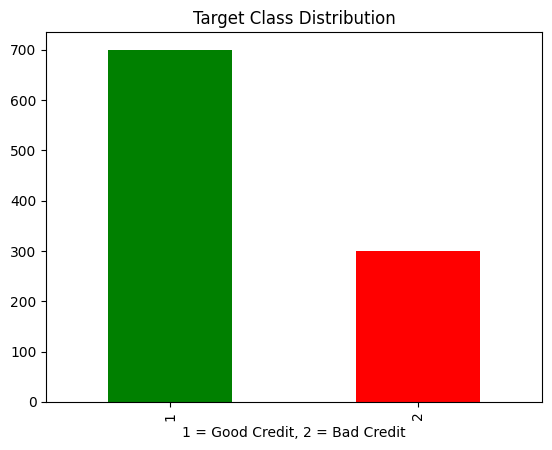

In [17]:
# Basic info
df.info()

# Check class distribution
df['Creditworthiness'].value_counts().plot(kind='bar', title='Target Class Distribution', color=['green', 'red'])
plt.xlabel('1 = Good Credit, 2 = Bad Credit')
plt.show()


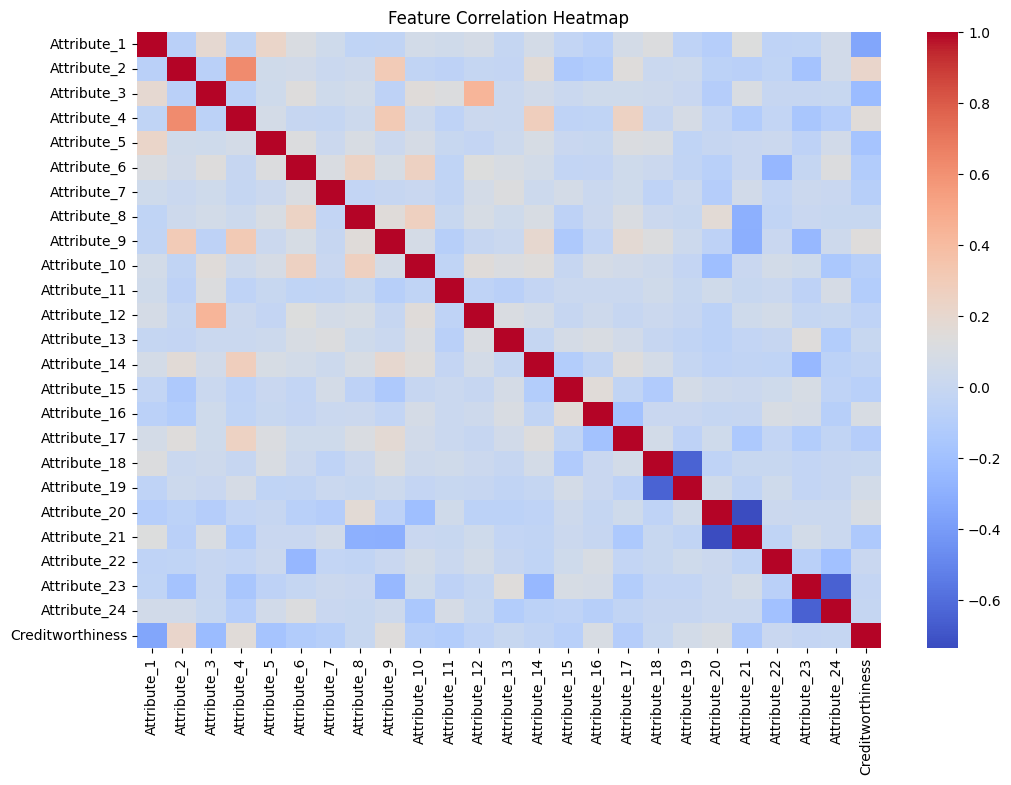

In [18]:
# Summary stats
df.describe()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [19]:
# Split features and label
X = df.drop('Creditworthiness', axis=1)
y = df['Creditworthiness']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [20]:
# Initialize and train
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

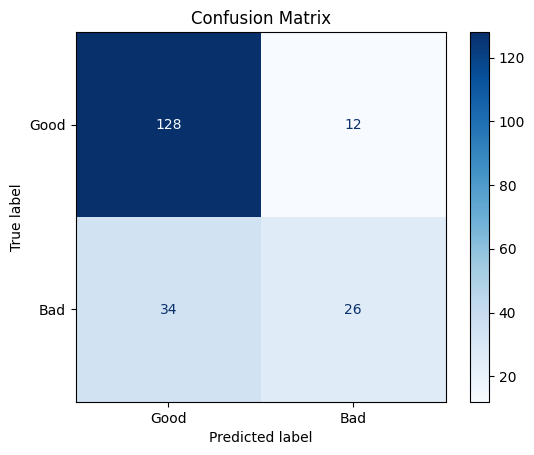

              precision    recall  f1-score   support

        Good       0.79      0.91      0.85       140
         Bad       0.68      0.43      0.53        60

    accuracy                           0.77       200
   macro avg       0.74      0.67      0.69       200
weighted avg       0.76      0.77      0.75       200

ROC AUC Score (1=Good): 0.208


In [21]:
# Predict
y_pred = rf_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Good', 'Bad'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred, target_names=['Good', 'Bad']))

# ROC AUC
y_proba = rf_model.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test == 1, y_proba)
print(f"ROC AUC Score (1=Good): {roc_score:.3f}")


In [22]:
# Apply cost matrix as per german.doc
# Cost matrix: 
# Actual\Predicted | Good (1) | Bad (2)
# Good (1)         |    0     |   1
# Bad (2)          |    5     |   0

cost_matrix = np.array([[0, 1],
                        [5, 0]])

total_cost = sum([
    cost_matrix[actual-1][pred-1]
    for actual, pred in zip(y_test, y_pred)
])

print(f"Total Misclassification Cost: {total_cost}")


Total Misclassification Cost: 182


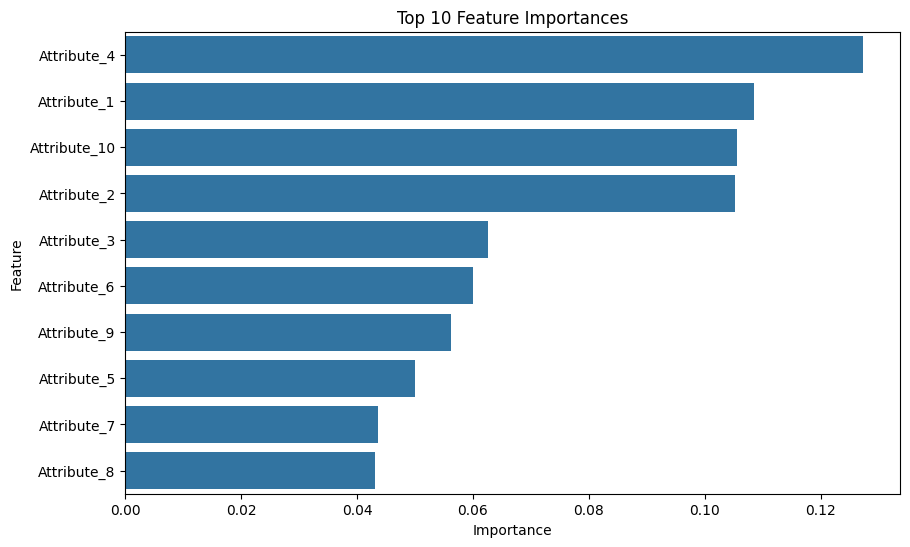

In [23]:
# Feature importances
importances = rf_model.feature_importances_
features = df.columns[:-1]
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title('Top 10 Feature Importances')
plt.show()


Conclusion:

-The Random Forest model was able to classify creditworthiness with decent performance.
-Important features include Duration, Credit amount, Age, and Employment history.
-Cost-sensitive analysis shows the real-world penalty of misclassification.
-Future steps could include hyperparameter tuning, ensemble stacking, and incorporating domain knowledge.